In [1]:
# Import all libraries
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd
import pickle
import re
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import warnings


In [2]:
warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to C:\Users\Filiz
[nltk_data]     Gürsan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Filiz
[nltk_data]     Gürsan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load dataset
#data = pd.read_csv('/content/UpdatedResumeDataSet.csv', engine='python')
data = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8') # Comment this line and uncomment the above line if this does not work for you
data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
print("Verisetinde yer alan özgeçmişlerin kategorilerinin gösterimi: \n\n")
print(data['Category'].unique())

Verisetinde yer alan özgeçmişlerin kategorilerinin gösterimi: 


['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [6]:
# Print unique categories of resumes
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
ETL Developer                40
Operations Manager           40
Mechanical Engineer          40
Blockchain                   40
Sales                        40
Data Science                 40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


In [7]:
# Drop rows where category is "Testing" and store new size of dataset
data = data[data.Category != 'Testing']
data_size = len(data)

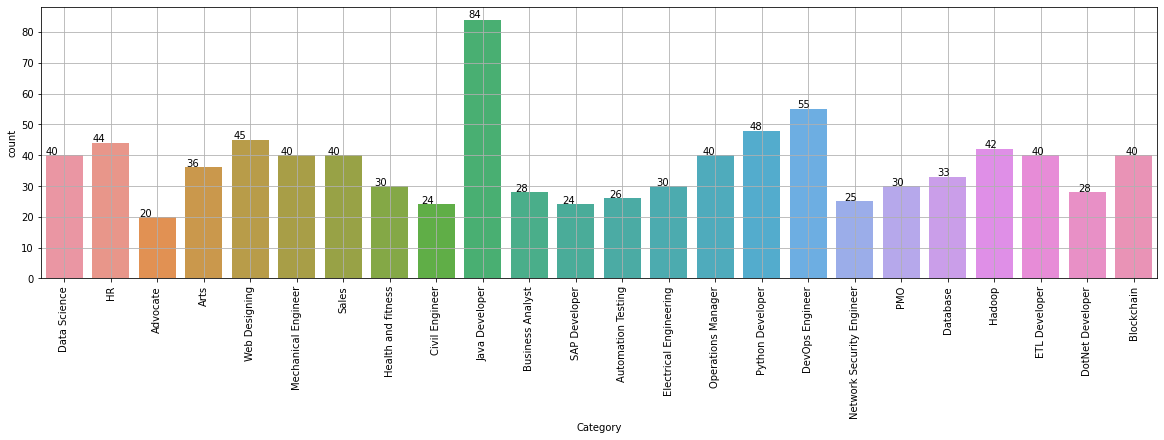

In [8]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=data)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

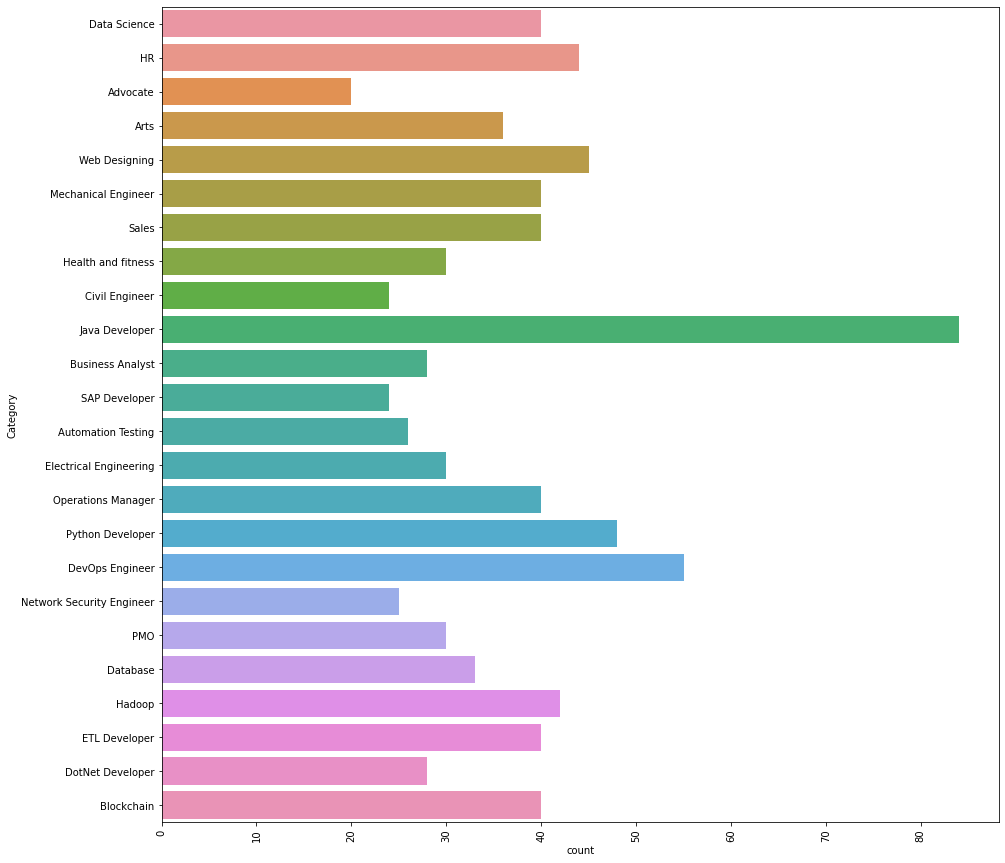

In [9]:
# Bar graph visualization
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

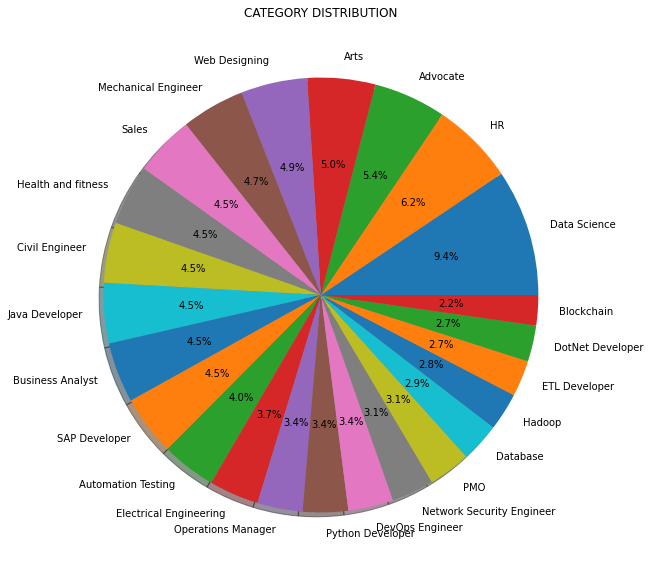

In [10]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].unique()

plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

In [11]:
# Get set of stopwords
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english')+['``',"''"])

In [12]:
# Function to clean resume text
def clean_text(resume_text):
    resume_text = re.sub('http\S+\s*', ' ', resume_text)  # remove URLs
    resume_text = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    resume_text = re.sub('#\S+', '', resume_text)  # remove hashtags
    resume_text = re.sub('@\S+', '  ', resume_text)  # remove mentions
    resume_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@
    [\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    resume_text = re.sub(r'[^\x00-\x7f]',r' ', resume_text) 
    resume_text = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    resume_text = resume_text.lower()  # convert to lowercase
    resume_text_tokens = word_tokenize(resume_text)  # tokenize
    filtered_text = [w for w in resume_text_tokens if not w in stopwords_set]
    # remove stopwords
    return ' '.join(filtered_text)

In [13]:
data["Resume"] = data["Resume"].str.lower()
data.head()

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."


In [14]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

data["Resume"] = data["Resume"].apply(lambda text: remove_punctuation(text))
data.head()

,Category,Resume
0,Data Science,skills programming languages python pandas nu...
1,Data Science,education details \r\nmay 2013 to may 2017 be ...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,education details \r\n mca ymcaust faridaba...


In [15]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [16]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

data["Resume"] = data["Resume"].apply(lambda text: remove_stopwords(text))
data.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education details may 2013 may 2017 uitrgpv da...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,education details mca ymcaust faridabad haryan...


In [17]:
from collections import Counter
cnt = Counter()
for text in data["Resume"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('â\x80¢', 11563),
 ('exprience', 3599),
 ('company', 3386),
 ('project', 3223),
 ('months', 3063),
 ('description', 2992),
 ('details', 2836),
 ('data', 2125),
 ('management', 1909),
 ('team', 1878)]

In [18]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

data["Resume"] = data["Resume"].apply(lambda text: remove_freqwords(text))
data.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education may 2013 may 2017 uitrgpv scientist ...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education mca ymcaust faridabad haryana scienc...


In [19]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

data["Resume"] = data["Resume"].apply(lambda text: remove_rarewords(text))
data.head()

,Category,Resume
0,Data Science,skills programming languages python pandas num...
1,Data Science,education may 2013 may 2017 uitrgpv scientist ...
2,Data Science,areas interest deep learning control system de...
3,Data Science,skills r python sap hana tableau sap hana sql ...
4,Data Science,education mca ymcaust faridabad haryana scienc...


In [20]:
print(data['Resume'][891])

skills bitcoin ethereum solidity hyperledger beginner go beginner r3 corda beginner tendermint nodejs c programming java machine learning specilaized brain computer interface computer networking server admin computer vision analytics cloud computing reactjs angulareducation january 2014 january 2018 bachelor engineering computer science engineering thakur college engineering technology september 2016 march 2017 dynamic blood bank system mumbai maharashtra iit january 2014 cbse senior secondary january 2011 cbse banking vidyashram public school blockchain developer blockchain developer zhypility technologies skill networking 27 analytics 11 computer vision 6 java 6 machine learning 6 monthscompany zhypility technologies une 2018 area business owner amway enterprise limited business strategizing promotion analytics networking terms virtual developing prototype smart india hackthon deployment level 3networking switch intern bharti airtel private limited mumbai 1international research scho

In [21]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

data["Resume"] = data["Resume"].apply(lambda text: stem_words(text))
data.head()

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ may 2013 may 2017 uitrgpv scientist scien...
2,Data Science,area interest deep learn control system design...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ mca ymcaust faridabad haryana scienc inte...


In [22]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["Resume"] = data["Resume"].apply(lambda text: lemmatize_words(text))
data.head()

,Category,Resume
0,Data Science,skill program languag python panda numpi scipi...
1,Data Science,educ may 2013 may 2017 uitrgpv scientist scien...
2,Data Science,area interest deep learn control system design...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,educ mca ymcaust faridabad haryana scienc inte...


In [23]:
print(data['Resume'][891])

skill bitcoin ethereum solid hyperledg beginn go beginn r3 corda beginn tendermint nodej c program java machin learn specila brain comput interfac comput network server admin comput vision analyt cloud comput reactj angulareduc januari 2014 januari 2018 bachelor engin comput scienc engin thakur colleg engin technolog septemb 2016 march 2017 dynam blood bank system mumbai maharashtra iit januari 2014 cbse senior secondari januari 2011 cbse bank vidyashram public school blockchain develop blockchain develop zhypil technolog skill network 27 analyt 11 comput vision 6 java 6 machin learn 6 monthscompani zhypil technolog une 2018 area busi owner amway enterpris limit busi strateg promot analyt network term virtual develop prototyp smart india hackthon deploy level 3network switch intern bharti airtel privat limit mumbai 1intern research scholar univers rome tor vergata rome nov 2017 nov 2017 done research realiti base brain comput interfac propos paper intern journal advanc research ijar206

In [24]:
# Print a sample original resume
print('--- Original resume ---')
print(data['Resume'][0])

--- Original resume ---
skill program languag python panda numpi scipi scikitlearn matplotlib sql java javascriptjqueri machin learn regress svm naã¯v bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch d3j dcj plotli kibana matplotlib ggplot tableau other regular express html cs angular 6 logstash kafka python flask git docker comput vision open cv understand deep learningeduc scienc assur associ scienc assur associ ernst young llp skill javascript 24 jqueri 24 python 24 monthscompani ernst young llp fraud investig disput servic assur technolog assist review tar technolog assist review assist acceler review process run analyt gener report core member help develop autom review platform tool scratch assist e discoveri domain tool implement predict code topic model autom review result reduc labor cost time spent la

In [25]:
# Clean the resume
data['cleaned_resume'] = data.Resume.apply(lambda x: clean_text(x))

In [26]:
print('--- Cleaned resume ---')
print(data['cleaned_resume'][0])

--- Cleaned resume ---
skill program languag python panda numpi scipi scikitlearn matplotlib sql java javascriptjqueri machin learn regress svm na v bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch d3j dcj plotli kibana matplotlib ggplot tableau regular express html cs angular 6 logstash kafka python flask git docker comput vision open cv understand deep learningeduc scienc assur associ scienc assur associ ernst young llp skill javascript 24 jqueri 24 python 24 monthscompani ernst young llp fraud investig disput servic assur technolog assist review tar technolog assist review assist eler review process run analyt gener report core member help develop autom review platform tool scratch assist e discoveri domain tool implement predict code topic model autom review result reduc labor cost time spent lawyer review

In [27]:
# Get features and labels from data and shuffle
features = data['cleaned_resume'].values
original_labels = data['Category'].values
labels = original_labels[:]

In [28]:
for i in range(data_size):
  labels[i] = str(labels[i].lower())  # convert to lowercase
  labels[i] = labels[i].replace(" ", "")  # use hyphens to convert multi-token labels into single tokens

In [29]:
import random
random.seed(20)
features, labels = shuffle(features, labels, random_state=20)

In [30]:
# Print example feature and label
print(features[0])
print(labels[0])

educ august 2010 may 2017 electron commun jabalpur madhya pradesh takshshila institut technolog java develop skill java javascript 6 monthscompani wab softwer pvt ltd jr java develop
javadeveloper


In [31]:
# Split for train and test
train_split = 0.8
train_size = int(train_split * data_size)

train_features = features[:train_size]
train_labels = labels[:train_size]

test_features = features[train_size:]
test_labels = labels[train_size:]

In [32]:
# Print size of each split
print(len(train_labels))
print(len(test_labels))

713
179


In [33]:
# Tokenize feature data and print word dictionary
vocab_size = 6000
oov_tok = '<OOV>'

feature_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
feature_tokenizer.fit_on_texts(features)

feature_index = feature_tokenizer.word_index
print(dict(list(feature_index.items())))

{'<OOV>': 1, 'develop': 2, 'work': 3, 'skill': 4, 'test': 5, 'use': 6, '1': 7, 'system': 8, 'requir': 9, 'engin': 10, 'manag': 11, 'respons': 12, 'report': 13, 'databas': 14, 'year': 15, 'client': 16, 'design': 17, 'servic': 18, 'oper': 19, 'technolog': 20, 'process': 21, 'applic': 22, 'custom': 23, 'maharashtra': 24, 'busi': 25, 'le': 26, 'server': 27, '6': 28, 'provid': 29, 'ltd': 30, 'java': 31, 'product': 32, 'pune': 33, 'januari': 34, 'activ': 35, 'sql': 36, 'document': 37, 'perform': 38, 'role': 39, 'ensur': 40, 'time': 41, 'creat': 42, 'maintain': 43, 'monitor': 44, 'user': 45, 'softwar': 46, 'autom': 47, 'sale': 48, 'script': 49, 'univers': 50, 'support': 51, 'plan': 52, 'pvt': 53, 'technic': 54, 'india': 55, 'variou': 56, 'environ': 57, 'prepar': 58, 'complet': 59, 'monthscompani': 60, 'job': 61, 'issu': 62, 'implement': 63, 'handl': 64, 'control': 65, 'tool': 66, 'python': 67, 'base': 68, 'like': 69, 'train': 70, 'web': 71, 'network': 72, 'commun': 73, 'solut': 74, 'educ': 75

In [34]:
# Print example sequences from train and test datasets
train_feature_sequences = feature_tokenizer.texts_to_sequences(train_features)
print(train_feature_sequences[0])

test_feature_sequences = feature_tokenizer.texts_to_sequences(test_features)
print(test_feature_sequences[0])

[75, 577, 300, 250, 143, 400, 73, 3805, 1047, 588, 3806, 180, 20, 31, 2, 4, 31, 144, 28, 60, 3807, 3808, 53, 30, 1013, 31, 2]
[54, 4, 79, 138, 31, 492, 395, 366, 2471, 71, 20, 390, 440, 239, 144, 146, 220, 1291, 14, 80, 783, 66, 602, 366, 66, 1208, 244, 1466, 1228, 464, 3942, 19, 8, 113, 676, 287, 424, 209, 164, 31, 2, 334, 3943, 54, 180, 31, 334, 3944, 120, 1258, 407, 2639, 510, 334, 2780, 61, 75, 34, 273, 1409, 33, 24, 33, 50, 34, 211, 1259, 708, 24, 708, 50, 34, 263, 286, 708, 24, 708, 50, 34, 300, 238, 708, 24, 708, 50, 31, 2, 1152, 1722, 31, 2, 4, 218, 26, 7, 15, 220, 26, 7, 15, 492, 26, 7, 15, 390, 26, 7, 15, 366, 26, 7, 15, 31, 26, 7, 15, 146, 26, 7, 15, 395, 26, 7, 15, 144, 26, 7, 15, 239, 26, 7, 15, 366, 2471, 26, 7, 15, 60, 1977, 20, 3, 31, 2, 2, 112, 87, 6, 31, 492, 395, 220, 71, 20, 1977, 20, 1307, 20, 289, 31, 492, 395, 390, 440, 239, 144, 146, 220, 239, 7, 314, 2162, 48, 166, 46, 344, 59, 384, 435, 1578, 71, 22, 285, 6, 31, 492, 395, 144, 146, 220, 80, 499, 179, 16, 160, 

In [35]:
# Tokenize label data and print label dictionary
label_tokenizer = Tokenizer(lower=True)
label_tokenizer.fit_on_texts(labels)

label_index = label_tokenizer.word_index
print(dict(list(label_index.items())))

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'etldeveloper': 7, 'blockchain': 8, 'operationsmanager': 9, 'datascience': 10, 'mechanicalengineer': 11, 'sales': 12, 'arts': 13, 'database': 14, 'electricalengineering': 15, 'healthandfitness': 16, 'pmo': 17, 'dotnetdeveloper': 18, 'businessanalyst': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}


In [36]:
# Print example label encodings from train and test datasets
train_label_sequences = label_tokenizer.texts_to_sequences(train_labels)
print(train_label_sequences[0])

test_label_sequences = label_tokenizer.texts_to_sequences(test_labels)
print(test_label_sequences[0])

[1]
[1]


In [37]:
# Pad sequences for feature data
max_length = 300
trunc_type = 'post'
pad_type = 'post'

train_feature_padded = pad_sequences(train_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)
test_feature_padded = pad_sequences(test_feature_sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

In [38]:
# Print example padded sequences from train and test datasets
print(train_feature_padded[0])
print(test_feature_padded[0])

[  75  577  300  250  143  400   73 3805 1047  588 3806  180   20   31
    2    4   31  144   28   60 3807 3808   53   30 1013   31    2    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [39]:
# Define the neural network
embedding_dim = 64

model = tf.keras.Sequential([
  # Add an Embedding layer expecting input vocab of size 6000, and output embedding dimension of size 64 we set at the top
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=300),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
  #tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(embedding_dim, activation='relu'),

  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(25, activation='softmax')
])

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 64)           384000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1625      
Total params: 459,929
Trainable params: 459,929
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Alternative model
embedding_dim = 64
num_categories = 25

In [42]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=300),
  tf.keras.layers.GlobalMaxPooling1D(),

  # use ReLU in place of tanh function since they are very good alternatives of each other.
  tf.keras.layers.Dense(128, activation='relu'),
  # Add a Dense layer with 25 units and softmax activation for probability distribution
  tf.keras.layers.Dense(num_categories, activation='softmax'),])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 64)           384000    
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                3225      
Total params: 395,545
Trainable params: 395,545
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model and convert train/test data into NumPy arrays
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
# Features
train_feature_padded = np.array(train_feature_padded)
test_feature_padded = np.array(test_feature_padded)


In [45]:
# Labels
train_label_sequences = np.array(train_label_sequences)
test_label_sequences = np.array(test_label_sequences)

In [46]:
# Print example values
print(train_feature_padded[0])
print(train_label_sequences[0])
print(test_feature_padded[0])
print(test_label_sequences[0])

[  75  577  300  250  143  400   73 3805 1047  588 3806  180   20   31
    2    4   31  144   28   60 3807 3808   53   30 1013   31    2    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [47]:
# Train the neural network
num_epochs = 25

history = model.fit(train_feature_padded, train_label_sequences, epochs=num_epochs, shuffle = True, validation_data=(test_feature_padded, test_label_sequences), verbose=2)

Epoch 1/25
23/23 - 1s - loss: 3.1966 - accuracy: 0.0926 - val_loss: 3.1683 - val_accuracy: 0.0726
Epoch 2/25
23/23 - 0s - loss: 3.1426 - accuracy: 0.0996 - val_loss: 3.1177 - val_accuracy: 0.0726
Epoch 3/25
23/23 - 0s - loss: 3.0769 - accuracy: 0.0996 - val_loss: 3.0618 - val_accuracy: 0.0726
Epoch 4/25
23/23 - 0s - loss: 2.9999 - accuracy: 0.0996 - val_loss: 2.9852 - val_accuracy: 0.0726
Epoch 5/25
23/23 - 0s - loss: 2.8864 - accuracy: 0.0996 - val_loss: 2.8492 - val_accuracy: 0.0726
Epoch 6/25
23/23 - 0s - loss: 2.7158 - accuracy: 0.1445 - val_loss: 2.6492 - val_accuracy: 0.2346
Epoch 7/25
23/23 - 0s - loss: 2.4627 - accuracy: 0.4825 - val_loss: 2.3605 - val_accuracy: 0.5028
Epoch 8/25
23/23 - 0s - loss: 2.1298 - accuracy: 0.5680 - val_loss: 1.9944 - val_accuracy: 0.6760
Epoch 9/25
23/23 - 0s - loss: 1.7354 - accuracy: 0.7686 - val_loss: 1.5847 - val_accuracy: 0.8715
Epoch 10/25
23/23 - 0s - loss: 1.3339 - accuracy: 0.9074 - val_loss: 1.1787 - val_accuracy: 0.9218
Epoch 11/25
23/23 -

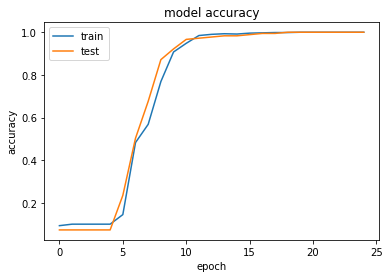

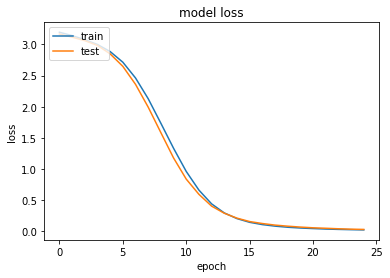

In [48]:
# Plot the training and validation loss 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# print example feature and its correct label
print(test_features[5])
print(test_labels[5])

educ may 1999 septemb 2002 diploma mechan engg mumbai maharashtra institut mechan engg may 1998 may 1999 diploma mechan engg servic ite may 1993 may 1995 mumbai maharashtra industri train institut sr executivemechan engin autom project consult sr executivemechan engin autom project consult mechan engin skill microsoft offic word excelauto cadmicro station j erp 3d model softwar 120 monthscompani mechan engin role respons applic engin pre sale insid sale provid applic support insid sale personnel outsid sale channel provid product select materi construct technic recommend particip necessari train activ establish technic compet also particip field servic trip direct top mgmt assist brand manag andor product manag need take activ role support project quotat respons technic part quotat includ select size cost pneumat autom product valv linear rotari actuat field fabric equip basi custom sheet engin draw travel requir support field sale channel promot product servic perform detail review cu

In [50]:
# Create padded sequence for example
resume_example = test_features[5]
example_sequence = feature_tokenizer.texts_to_sequences([resume_example])
example_padded = pad_sequences(example_sequence, maxlen=max_length, padding=pad_type, truncating=trunc_type)
example_padded = np.array(example_padded)
print(example_padded)

[[  75  250 1706 1014 2061  224  241  925   86   24  180  241  925  250
  1552  250 1706  224  241  925   18 3336  250 3337  250 2183   86   24
   174   70  180  472 2184   10   47   87  145  472 2184   10   47   87
   145  241   10    4  255  128  570 3338 3339  459  451  404 1224  172
    46 1585   60  241   10   39   12   22   10 1991   48 1375   48   29
    22   51 1375   48 1841 2185   48  614   29   32  423  242  485   54
   779  159  662   70   35  505   54  790  148  159  461   18 2507  354
   644 3340  198 1430   11 1342   32   11  348  253   35   39   51   87
   580   12   54  310  580   96  423  249  205 1155   47   32  904 1397
  2186  994  461  703  381  302   23 1019   10  221  774    9   51  461
    48  614  350   32   18   38  397   88   23  177   29  494  995 1056
    23    9  249  423  904  994   58  205  203 1543  580   74   95   23
    54    9  101   54  233    9  123  846   54  205  178  495  580  663
  1924   96   54  463   95   23   37  271  159   23  316   21   

In [51]:
# Make a prediction
prediction = model.predict(example_padded)

In [52]:
# Verify that prediction has correct format
print(prediction[0])
print(len(prediction[0]))  # should be 25
print(np.sum(prediction[0]))  # should be 1

[5.8678e-08 1.3557e-04 1.1561e-03 4.5638e-05 8.9884e-06 3.4127e-05
 6.3625e-05 1.5480e-05 2.6034e-03 2.4724e-04 1.6841e-05 9.8540e-01
 5.6954e-04 4.1529e-05 1.5218e-03 3.8246e-04 4.0856e-04 4.8349e-05
 9.5293e-06 2.6851e-04 4.0073e-03 4.7042e-04 1.3403e-04 2.2908e-03
 1.2108e-04]
25
0.99999994


In [53]:
# Find maximum value in prediction and its index
print(max(prediction[0]))  # confidence in prediction (as a fraction of 1)
print(np.argmax(prediction[0])) # should be 3 which corresponds to python developer

0.9853989
11


In [54]:
# Indices of top 5 most probable solutions
indices = np.argpartition(prediction[0], -5)[-5:]
indices = indices[np.argsort(prediction[0][indices])]
indices = list(reversed(indices))
print(indices)

[11, 20, 8, 23, 14]


In [55]:
# Save model
model.save('model')

INFO:tensorflow:Assets written to: model\assets


In [56]:
# Save feature tokenizer
with open('feature_tokenizer.pickle', 'wb') as handle:
    pickle.dump(feature_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [57]:
# Save reverse dictionary of labels to encodings
label_to_encoding = dict(list(label_index.items()))
print(label_to_encoding)

{'javadeveloper': 1, 'devopsengineer': 2, 'pythondeveloper': 3, 'webdesigning': 4, 'hr': 5, 'hadoop': 6, 'etldeveloper': 7, 'blockchain': 8, 'operationsmanager': 9, 'datascience': 10, 'mechanicalengineer': 11, 'sales': 12, 'arts': 13, 'database': 14, 'electricalengineering': 15, 'healthandfitness': 16, 'pmo': 17, 'dotnetdeveloper': 18, 'businessanalyst': 19, 'automationtesting': 20, 'networksecurityengineer': 21, 'civilengineer': 22, 'sapdeveloper': 23, 'advocate': 24}


In [58]:
encoding_to_label = {}
for k, v in label_to_encoding.items():
  encoding_to_label[v] = k
print(encoding_to_label)


{1: 'javadeveloper', 2: 'devopsengineer', 3: 'pythondeveloper', 4: 'webdesigning', 5: 'hr', 6: 'hadoop', 7: 'etldeveloper', 8: 'blockchain', 9: 'operationsmanager', 10: 'datascience', 11: 'mechanicalengineer', 12: 'sales', 13: 'arts', 14: 'database', 15: 'electricalengineering', 16: 'healthandfitness', 17: 'pmo', 18: 'dotnetdeveloper', 19: 'businessanalyst', 20: 'automationtesting', 21: 'networksecurityengineer', 22: 'civilengineer', 23: 'sapdeveloper', 24: 'advocate'}


In [59]:
with open('dictionary.pickle', 'wb') as handle:
    pickle.dump(encoding_to_label, handle, protocol=pickle.HIGHEST_PROTOCOL)

print(encoding_to_label[np.argmax(prediction[0])])

mechanicalengineer


In [60]:
data.head()

,Category,Resume,cleaned_resume
0,datascience,skill program languag python panda numpi scipi...,skill program languag python panda numpi scipi...
1,datascience,educ may 2013 may 2017 uitrgpv scientist scien...,educ may 2013 may 2017 uitrgpv scientist scien...
2,datascience,area interest deep learn control system design...,area interest deep learn control system design...
3,datascience,skill r python sap hana tableau sap hana sql s...,skill r python sap hana tableau sap hana sql s...
4,datascience,educ mca ymcaust faridabad haryana scienc inte...,educ mca ymcaust faridabad haryana scienc inte...


In [61]:
data = data[["Category","cleaned_resume"]]
data.head()

,Category,cleaned_resume
0,datascience,skill program languag python panda numpi scipi...
1,datascience,educ may 2013 may 2017 uitrgpv scientist scien...
2,datascience,area interest deep learn control system design...
3,datascience,skill r python sap hana tableau sap hana sql s...
4,datascience,educ mca ymcaust faridabad haryana scienc inte...


In [62]:
review = data["cleaned_resume"]

# Vord2Wec

In [63]:
import os
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
from gensim.models import Word2Vec
import nltk
nltk.download('wordnet')
stemmer = SnowballStemmer('english')

from numpy import dot
from numpy.linalg import norm

[nltk_data] Downloading package wordnet to C:\Users\Filiz
[nltk_data]     Gürsan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [64]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            if token == 'xxxx':
                continue
            result.append(lemmatize_stemming(token))
    
    return result

In [65]:
processed_docs = data['cleaned_resume'].map(preprocess)
processed_docs =list(processed_docs)

In [66]:
processed_docs[:10] # clean document

[['skill',
  'program',
  'languag',
  'python',
  'panda',
  'numpi',
  'scipi',
  'scikitlearn',
  'matplotlib',
  'java',
  'machin',
  'learn',
  'regress',
  'random',
  'forest',
  'deci',
  'tree',
  'boost',
  'techniqu',
  'cluster',
  'analysi',
  'word',
  'emb',
  'sentiment',
  'analysi',
  'natur',
  'languag',
  'process',
  'dimens',
  'reduct',
  'topic',
  'model',
  'neural',
  'databa',
  'visual',
  'mysql',
  'sqlserver',
  'cassandra',
  'hbase',
  'elasticsearch',
  'plot',
  'kibana',
  'matplotlib',
  'ggplot',
  'tableau',
  'regular',
  'express',
  'html',
  'angular',
  'logstash',
  'kafka',
  'python',
  'flask',
  'docker',
  'comput',
  'vision',
  'open',
  'understand',
  'deep',
  'learningeduc',
  'scienc',
  'assur',
  'associ',
  'scienc',
  'assur',
  'associ',
  'ernst',
  'young',
  'skill',
  'javascript',
  'jqueri',
  'python',
  'monthscompani',
  'ernst',
  'young',
  'fraud',
  'investig',
  'disput',
  'servic',
  'assur',
  'technolog'

In [67]:
def word2vec_model():
    w2v_model = Word2Vec(min_count=1,
                     window=3,
                     vector_size=50,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20)
    
    w2v_model.build_vocab(processed_docs)
    w2v_model.train(processed_docs, total_examples=w2v_model.corpus_count, epochs=300, report_delay=1)
    
    return w2v_model

In [68]:
w2v_model = word2vec_model()
#w2v_model.save('word2vec_model')

In [69]:
emb_vec = w2v_model.wv

In [70]:
emb_vec['program'] # It will return vector representation of the word anak

array([ 0.4575, -0.7234, -0.2979,  0.1481,  0.7111,  0.0686, -0.6568,
        1.4589, -0.326 , -0.0193,  0.3469, -1.2727,  1.1589,  0.4926,
        0.9804,  1.3532,  0.0684,  0.0897, -1.349 , -1.3557, -0.6557,
        0.0679, -0.009 , -0.3613,  1.771 , -0.2096,  0.1031, -0.3029,
        1.4367, -1.3922, -2.1185,  0.8039, -0.2828,  0.8158,  0.7432,
       -0.6286,  0.5075, -0.279 , -0.7579, -0.8394,  0.8299,  0.3914,
       -2.9816, -0.2976, -0.7538, -1.6102,  0.7721,  0.4918,  0.4113,
       -1.0816], dtype=float32)

# Finding similarity between two vector using cosine similarity

In [71]:
def find_similarity(sen1, sen2, model):
    p_sen1 = preprocess(sen1)
    p_sen2 = preprocess(sen2)
    
    sen_vec1 = np.zeros(50)
    sen_vec2 = np.zeros(50)
    for val in p_sen1:
        sen_vec1 = np.add(sen_vec1, model[val])

    for val in p_sen2:
        sen_vec2 = np.add(sen_vec2, model[val])
    
    return dot(sen_vec1,sen_vec2)/(norm(sen_vec1)*norm(sen_vec2))

In [72]:
find_similarity('areas interest deep learning control system', 'areas interest deep learning control system',emb_vec )

1.0

In [73]:
find_similarity('areas interest deep learning control system', 'areas interest control system deep learning ',emb_vec )

1.0

In [74]:
find_similarity('areas interest deep learning control system', 'try',emb_vec )

nan

In [75]:
df = data

In [76]:
def sampling_dataset(df):
    count = 5000
    class_df_sampled = pd.DataFrame(columns = ["cleaned_resume","Category"])
    temp = []
    for c in df.Category.unique():
        class_indexes = df[df.Category == c].index
        random_indexes = np.random.choice(class_indexes, count, replace=True)
        temp.append(df.loc[random_indexes])
        
    for each_df in temp:
        class_df_sampled = pd.concat([class_df_sampled,each_df],axis=0)
    
    return class_df_sampled


In [77]:
df = sampling_dataset(df)
df.reset_index(drop=True,inplace=True)
print (df.head())
print (df.shape)

                                      cleaned_resume     Category
0  person skill abil quickli grasp technic aspect...  datascience
1  educ mca ymcaust faridabad haryana scienc inte...  datascience
2  expertis quantit analysi decis analyt predict ...  datascience
3  educ may 2013 may 2017 uitrgpv scientist scien...  datascience
4  person skill abil quickli grasp technic aspect...  datascience
(120000, 2)


# TF-IDF

In [78]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

In [79]:
# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

In [80]:
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))
vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)

In [81]:
vect_text=vect.fit_transform(data["cleaned_resume"])

In [82]:
print(vect.get_feature_names())

['01', '10', '11', '11g', '12', '13', '14', '15', '16', '17', '20', '2000', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '24', '27', '28', '30', '31', '36', '45', '48', '60', '72', '91', '96', 'abil', 'abl', 'academ', 'academi', 'achiev', 'across', 'act', 'action', 'activ', 'actual', 'actuat', 'ad', 'addit', 'address', 'adher', 'admin', 'administr', 'advanc', 'advertis', 'agil', 'aim', 'air', 'ajax', 'alert', 'algorithm', 'allow', 'along', 'also', 'amravati', 'analysi', 'analyst', 'analyt', 'analyz', 'android', 'angular', 'annual', 'answer', 'ant', 'apach', 'api', 'app', 'appli', 'applic', 'apprais', 'appropri', 'approv', 'april', 'architect', 'architectur', 'area', 'around', 'arrang', 'art', 'asa', 'asp', 'aspnet', 'ass', 'asset', 'assign', 'assist', 'associ', 'assur', 'attend', 'audit', 'aug', 'august', 'author', 'autocad', 'autom', 'autosi', 'avail', 'aw', 'azur', 'bachelor', 'back', 'backend', 'backup', 'bank', 'bas

In [83]:
print(vect_text.shape)
type(vect_text)

(892, 1000)


scipy.sparse.csr.csr_matrix

In [84]:
idf=vect.idf_

In [85]:
dd=dict(zip(vect.get_feature_names(), idf))
l=sorted(dd, key=(dd).get)
# print(l)


In [86]:
print(l[0],l[-1])
print(dd['python'])
print(dd['work']) 

skill qaqc
2.61843684830267
1.2209064139158534


# LSA

In [87]:
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(vect_text)

In [88]:
print(lsa_top[0])
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[ 0.3647 -0.0669  0.0537 -0.0072 -0.001  -0.0585  0.0033  0.0433 -0.038
 -0.1573]
(892, 10)


In [89]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)

Document 0 :
Topic  0  :  36.46836605951977
Topic  1  :  -6.694396074497076
Topic  2  :  5.373455788518065
Topic  3  :  -0.7198428362572069
Topic  4  :  -0.1030292333638744
Topic  5  :  -5.845029247210982
Topic  6  :  0.3252775196620015
Topic  7  :  4.334410233494176
Topic  8  :  -3.7979957775823165
Topic  9  :  -15.728719600589516


In [90]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(10, 1000)
[[ 0.0053  0.0276  0.009  ...  0.01    0.0167  0.15  ]
 [-0.0098  0.0051 -0.0077 ... -0.0042  0.0342  0.2713]
 [-0.0029 -0.01   -0.007  ...  0.0112  0.006  -0.0817]
 ...
 [ 0.0162  0.0048 -0.0045 ...  0.0009  0.0118 -0.0359]
 [ 0.0033 -0.0126 -0.0118 ...  0.0239 -0.0178  0.026 ]
 [ 0.0007  0.0172  0.0015 ... -0.0054 -0.0123 -0.0028]]


In [91]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
develop java le year test use work engin januari maharashtra 

Topic 1: 
le java year python ajax maharashtra pune januari hibern spring 

Topic 2: 
java hadoop databas script hive use server develop test mysql 

Topic 3: 
hadoop hive python etl engin informatica sqoop pune hdf cluster 

Topic 4: 
le year sale manag size sort devop encrypt oper cricket 

Topic 5: 
autom server test shell engin script devop databas cloud mysql 

Topic 6: 
ui applic photoshop loan design trust etl websit role web 

Topic 7: 
electr engin mechan design hadoop panel power civil hive test 

Topic 8: 
test etl informatica java hr autom busi case knowledg good 

Topic 9: 
electr etl informatica hr server engin databas civil mainten power 



# LDA 

In [92]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 

In [93]:
lda_top=lda_model.fit_transform(vect_text)

In [94]:
print(lda_top.shape)
print(lda_top[0])

(892, 10)
[0.0091 0.0091 0.0091 0.0091 0.0091 0.0091 0.9177 0.0091 0.0091 0.0091]


In [95]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)

1.0000000000000002


In [96]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.9144560328029312 %
Topic  1 :  0.9140849544895 %
Topic  2 :  0.914091561945075 %
Topic  3 :  0.914230446419226 %
Topic  4 :  0.9140771813959607 %
Topic  5 :  0.9141155592611319 %
Topic  6 :  91.77261016200296 %
Topic  7 :  0.914073556102264 %
Topic  8 :  0.9141859390032308 %
Topic  9 :  0.9140746065777231 %


In [97]:
print(lda_model.components_[0])
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[ 1.4505  2.6433  1.4724  0.5787  1.4206  1.2085  1.6959  0.9525  2.2239
  0.5371  2.0893  0.7793  1.0372  2.5404  0.6201  1.7675  0.9202  1.2162
  0.9491  1.4957  1.4433  1.2324  1.3039  1.7774  2.4105  1.7077  2.3415
  0.4607  1.2258  2.5553  0.4226  1.595   0.6723  1.1119  1.1767  1.2281
  0.9592  0.627   4.2509  1.0085  0.9547  0.8165  3.7024  2.7273  0.5644
  2.0342  7.3477  1.1975  1.2443  1.0726  1.0923  1.2705  1.6785  0.5626
  3.0889  1.9863  0.5879  0.42    0.8111  2.2607  0.4803  1.1845  0.986
  1.3545  2.1469  2.5705  0.314   2.6661  2.0078  2.734   2.94    0.3796
  0.945   1.1247  0.8017  0.3256  0.3975  0.9549  0.8794  1.7533  4.8352
  1.2206  1.6385  2.0471  1.6121  0.7613  0.8276  2.2715  1.1305  1.2011
  1.915   1.414   0.9312  0.4079  1.8364  0.9472  2.2232  4.1983  1.5053
  1.723   2.7422  3.0639  1.1456  0.5476  1.489   2.4105  3.6732  0.4861
  1.7983  0.4506  0.3346  2.4935  1.3432  0.7728  0.8506  5.4642  2.9893
  3.1629  1.163   0.3298  1.1094  2.091   1.0824  5.

In [98]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
report manag work oper client 

Topic 1: 
le year art hr maharashtra 

Topic 2: 
art hr januari draw mumbai 

Topic 3: 
januari fit sale colleg mumbai 

Topic 4: 
hr hive januari hadoop colleg 

Topic 5: 
hr may 2012 le june 

Topic 6: 
develop java use databas test 

Topic 7: 
hr profession commun univers monthscompani 

Topic 8: 
hadoop hive demand sqoop machin 

Topic 9: 
hr engin mba januari student 



In [99]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]    
  wordcloud = WordCloud(width=900, height=600).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

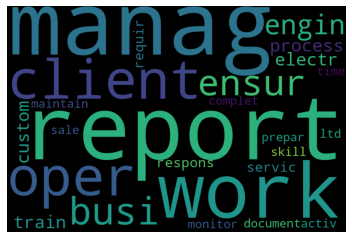

In [100]:
# topic 0
draw_word_cloud(0)

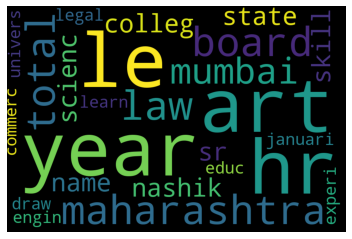

In [101]:
# topic 1
draw_word_cloud(1)

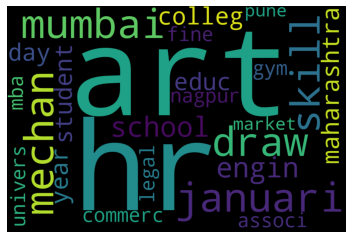

In [102]:
# topic 2
draw_word_cloud(2)

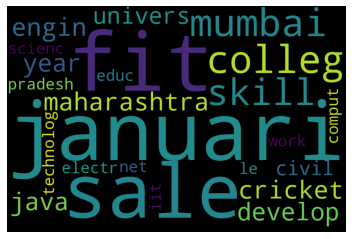

In [103]:
# topic 3
draw_word_cloud(3)

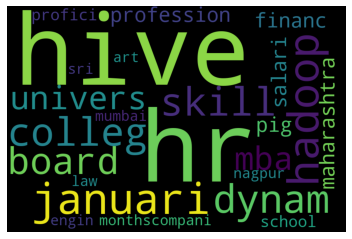

In [104]:
# topic 4
draw_word_cloud(4)

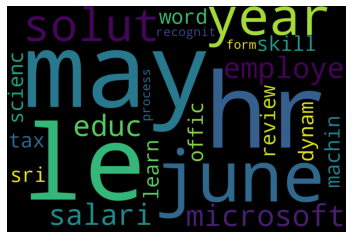

In [105]:
# topic 5
draw_word_cloud(5)

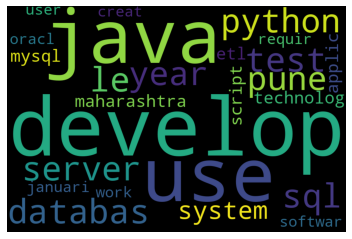

In [106]:
# topic 6
draw_word_cloud(6)

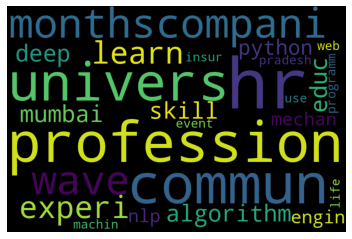

In [107]:
# topic 7
draw_word_cloud(7)

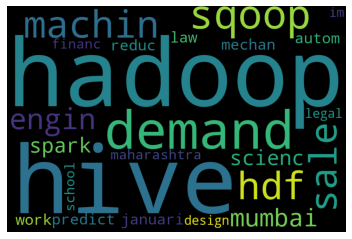

In [108]:
# topic 8
draw_word_cloud(8)

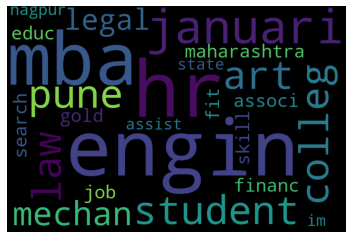

In [109]:
# topic 9
draw_word_cloud(9)